In [0]:
#@title Connect Google Drive (not required)
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

In [1]:
#@title Clone Repository
!git clone https://github.com/thedani/mannequinchallenge.git
%cd mannequinchallenge

Cloning into 'mannequinchallenge'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 226 (delta 3), reused 0 (delta 0), pack-reused 205
Receiving objects: 100% (226/226), 23.22 MiB | 14.07 MiB/s, done.
Resolving deltas: 100% (104/104), done.
/content/mannequinchallenge


# Place your images inside mannequinchallenge/infile/
Only JPG-Images will work for now ...

In [2]:
#@title Create depth maps
!python 2dtodepth.py --input=single_view

------------ Options -------------
batchSize: 8
beta1: 0.5
checkpoints_dir: ./checkpoints/
continue_train: False
display_freq: 100
display_id: 1
display_winsize: 256
fineSize: 256
gpu_ids: [0, 1, 2, 3]
human_data_term: 0
identity: 0.0
input: single_view
isTrain: True
lambda_A: 10.0
lambda_B: 10.0
loadSize: 286
lr: 0.0004
lr_decay_epoch: 8
lr_policy: step
max_dataset_size: inf
mode: Ours_Bilinear
model: pix2pix
nThreads: 2
name: test_local
ndf: 64
ngf: 64
niter: 100
niter_decay: 100
no_flip: False
no_html: False
no_lsgan: False
norm: instance
output_nc: 3
phase: train
pool_size: 50
print_freq: 100
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
simple_keypoints: 0
use_dropout: False
which_epoch: latest
which_model_netG: unet_256
-------------- End ----------------
========================= Video dataset #images = 1 =========
======================================  DIW NETWORK TRAIN FROM Ours_Bilinear=======================
===================Loading Pretrained Model OURS

<IPython.core.display.Javascript object>

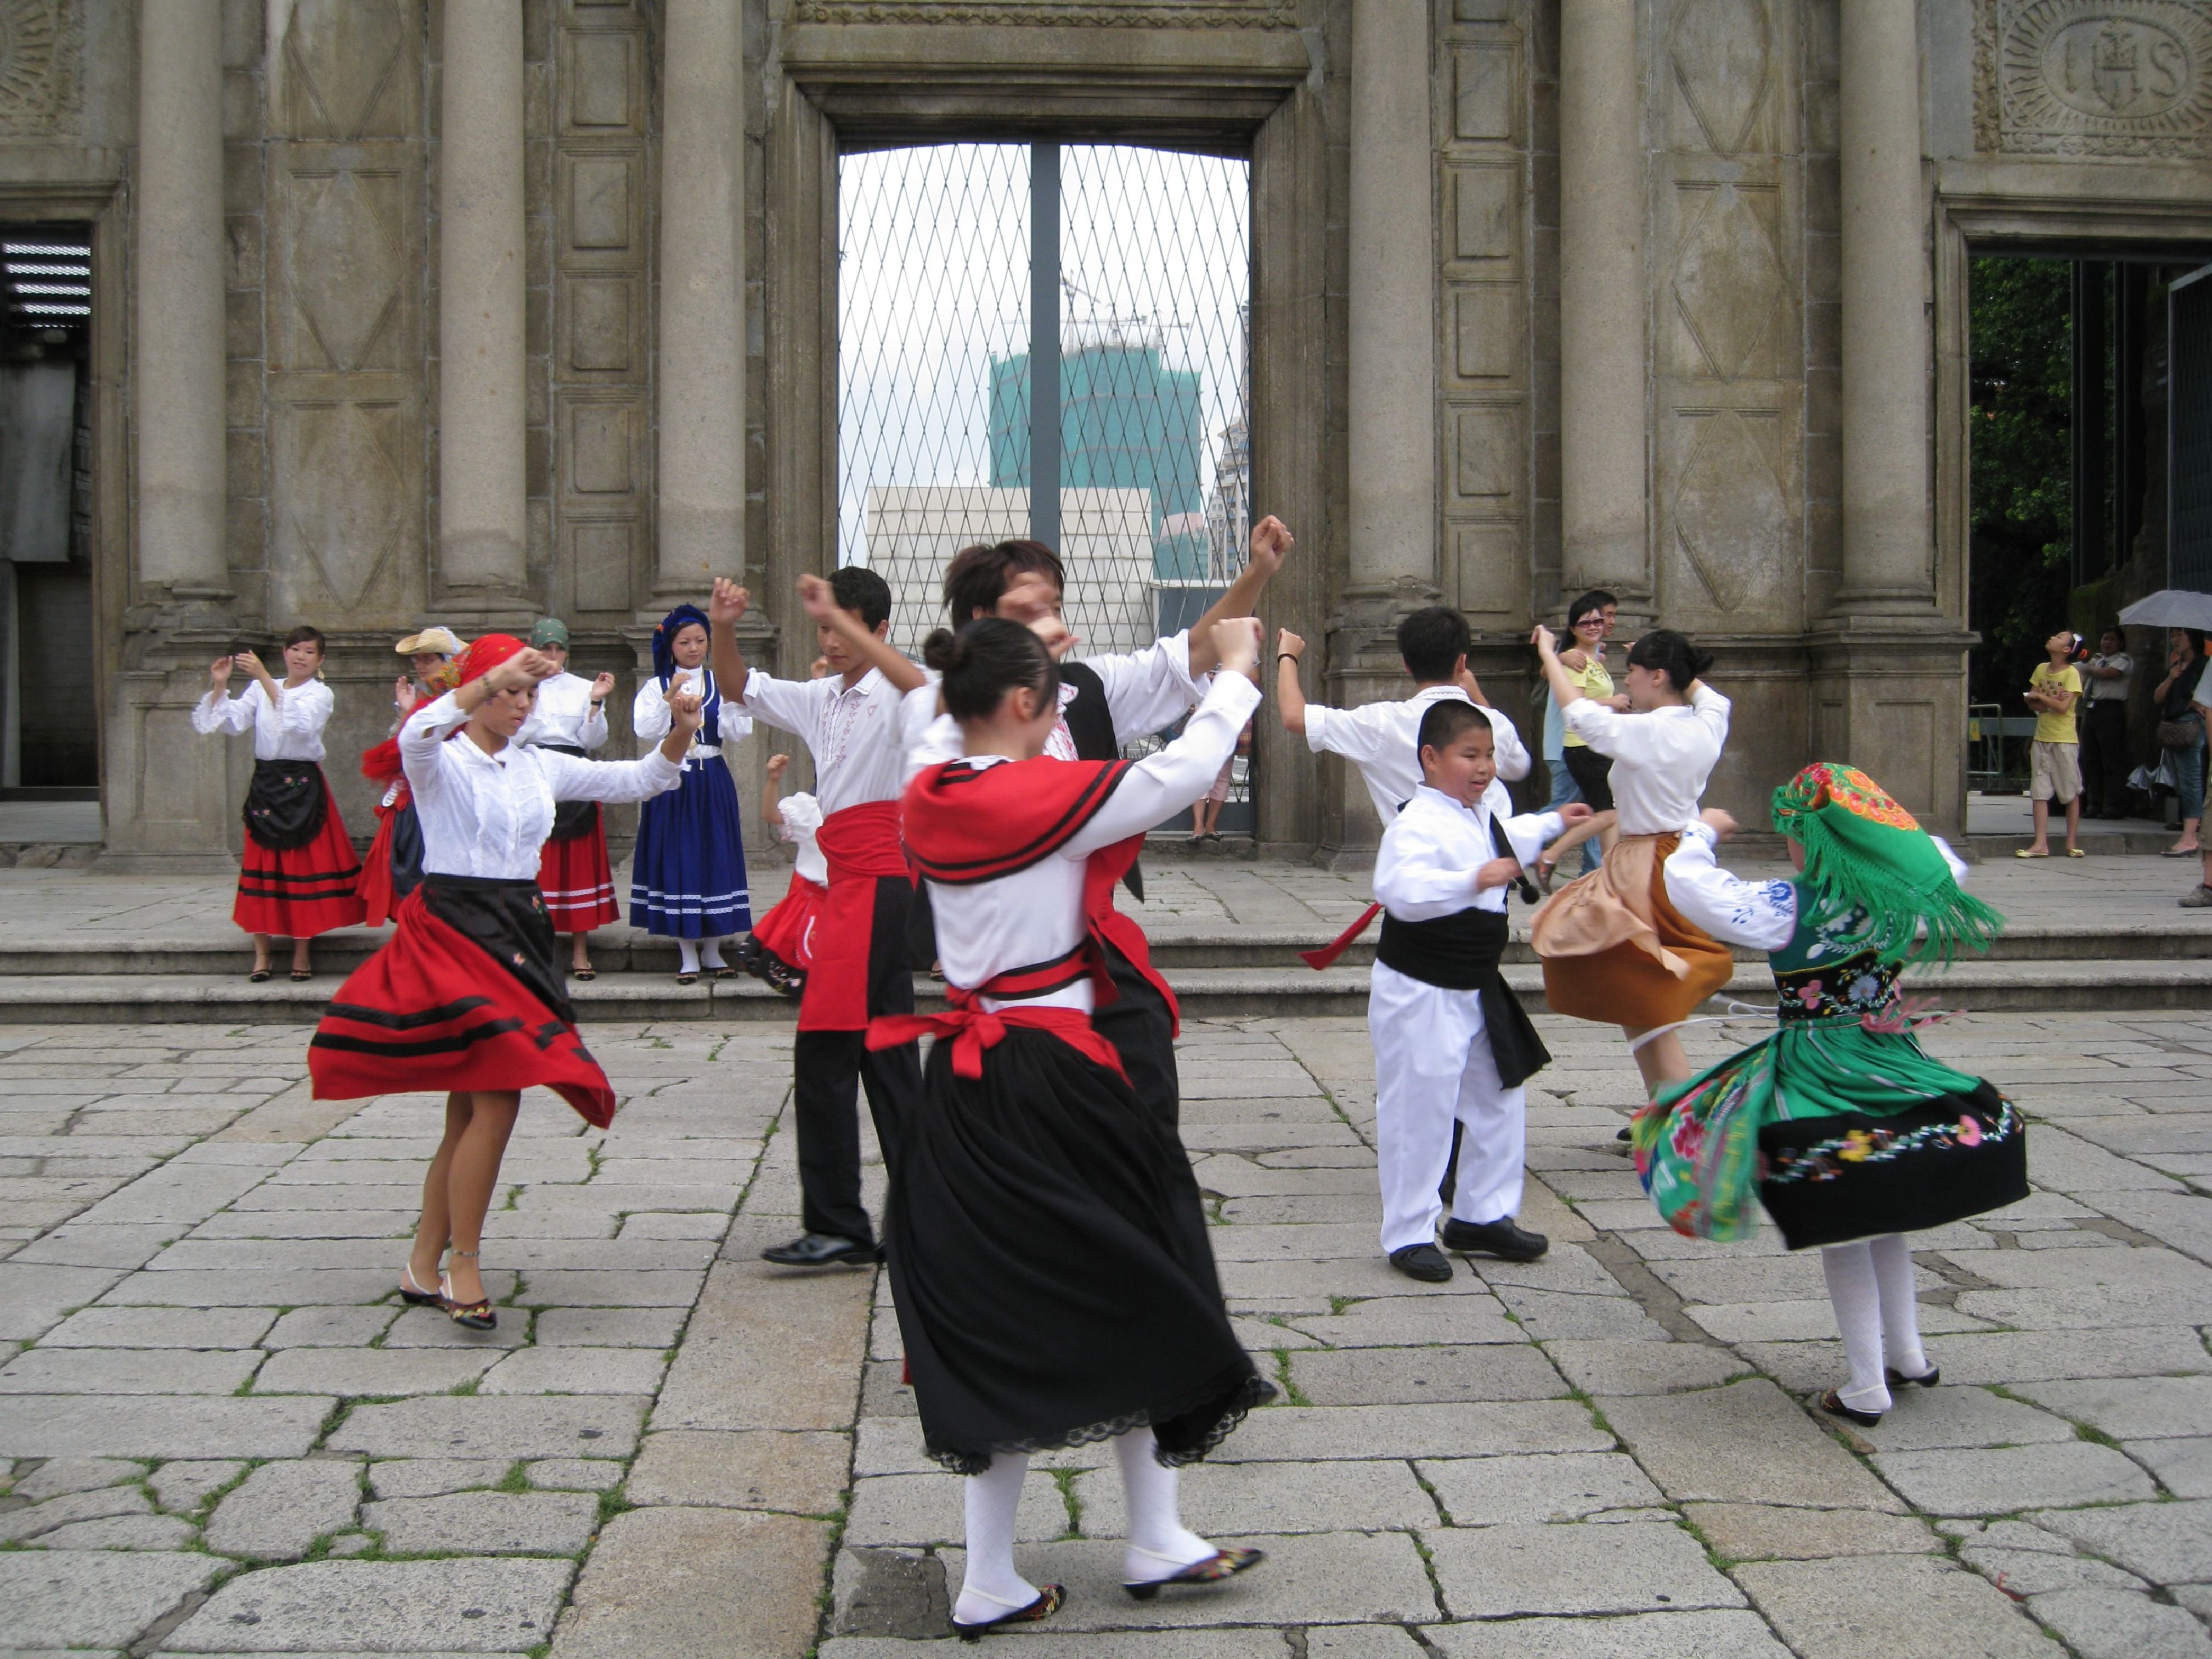

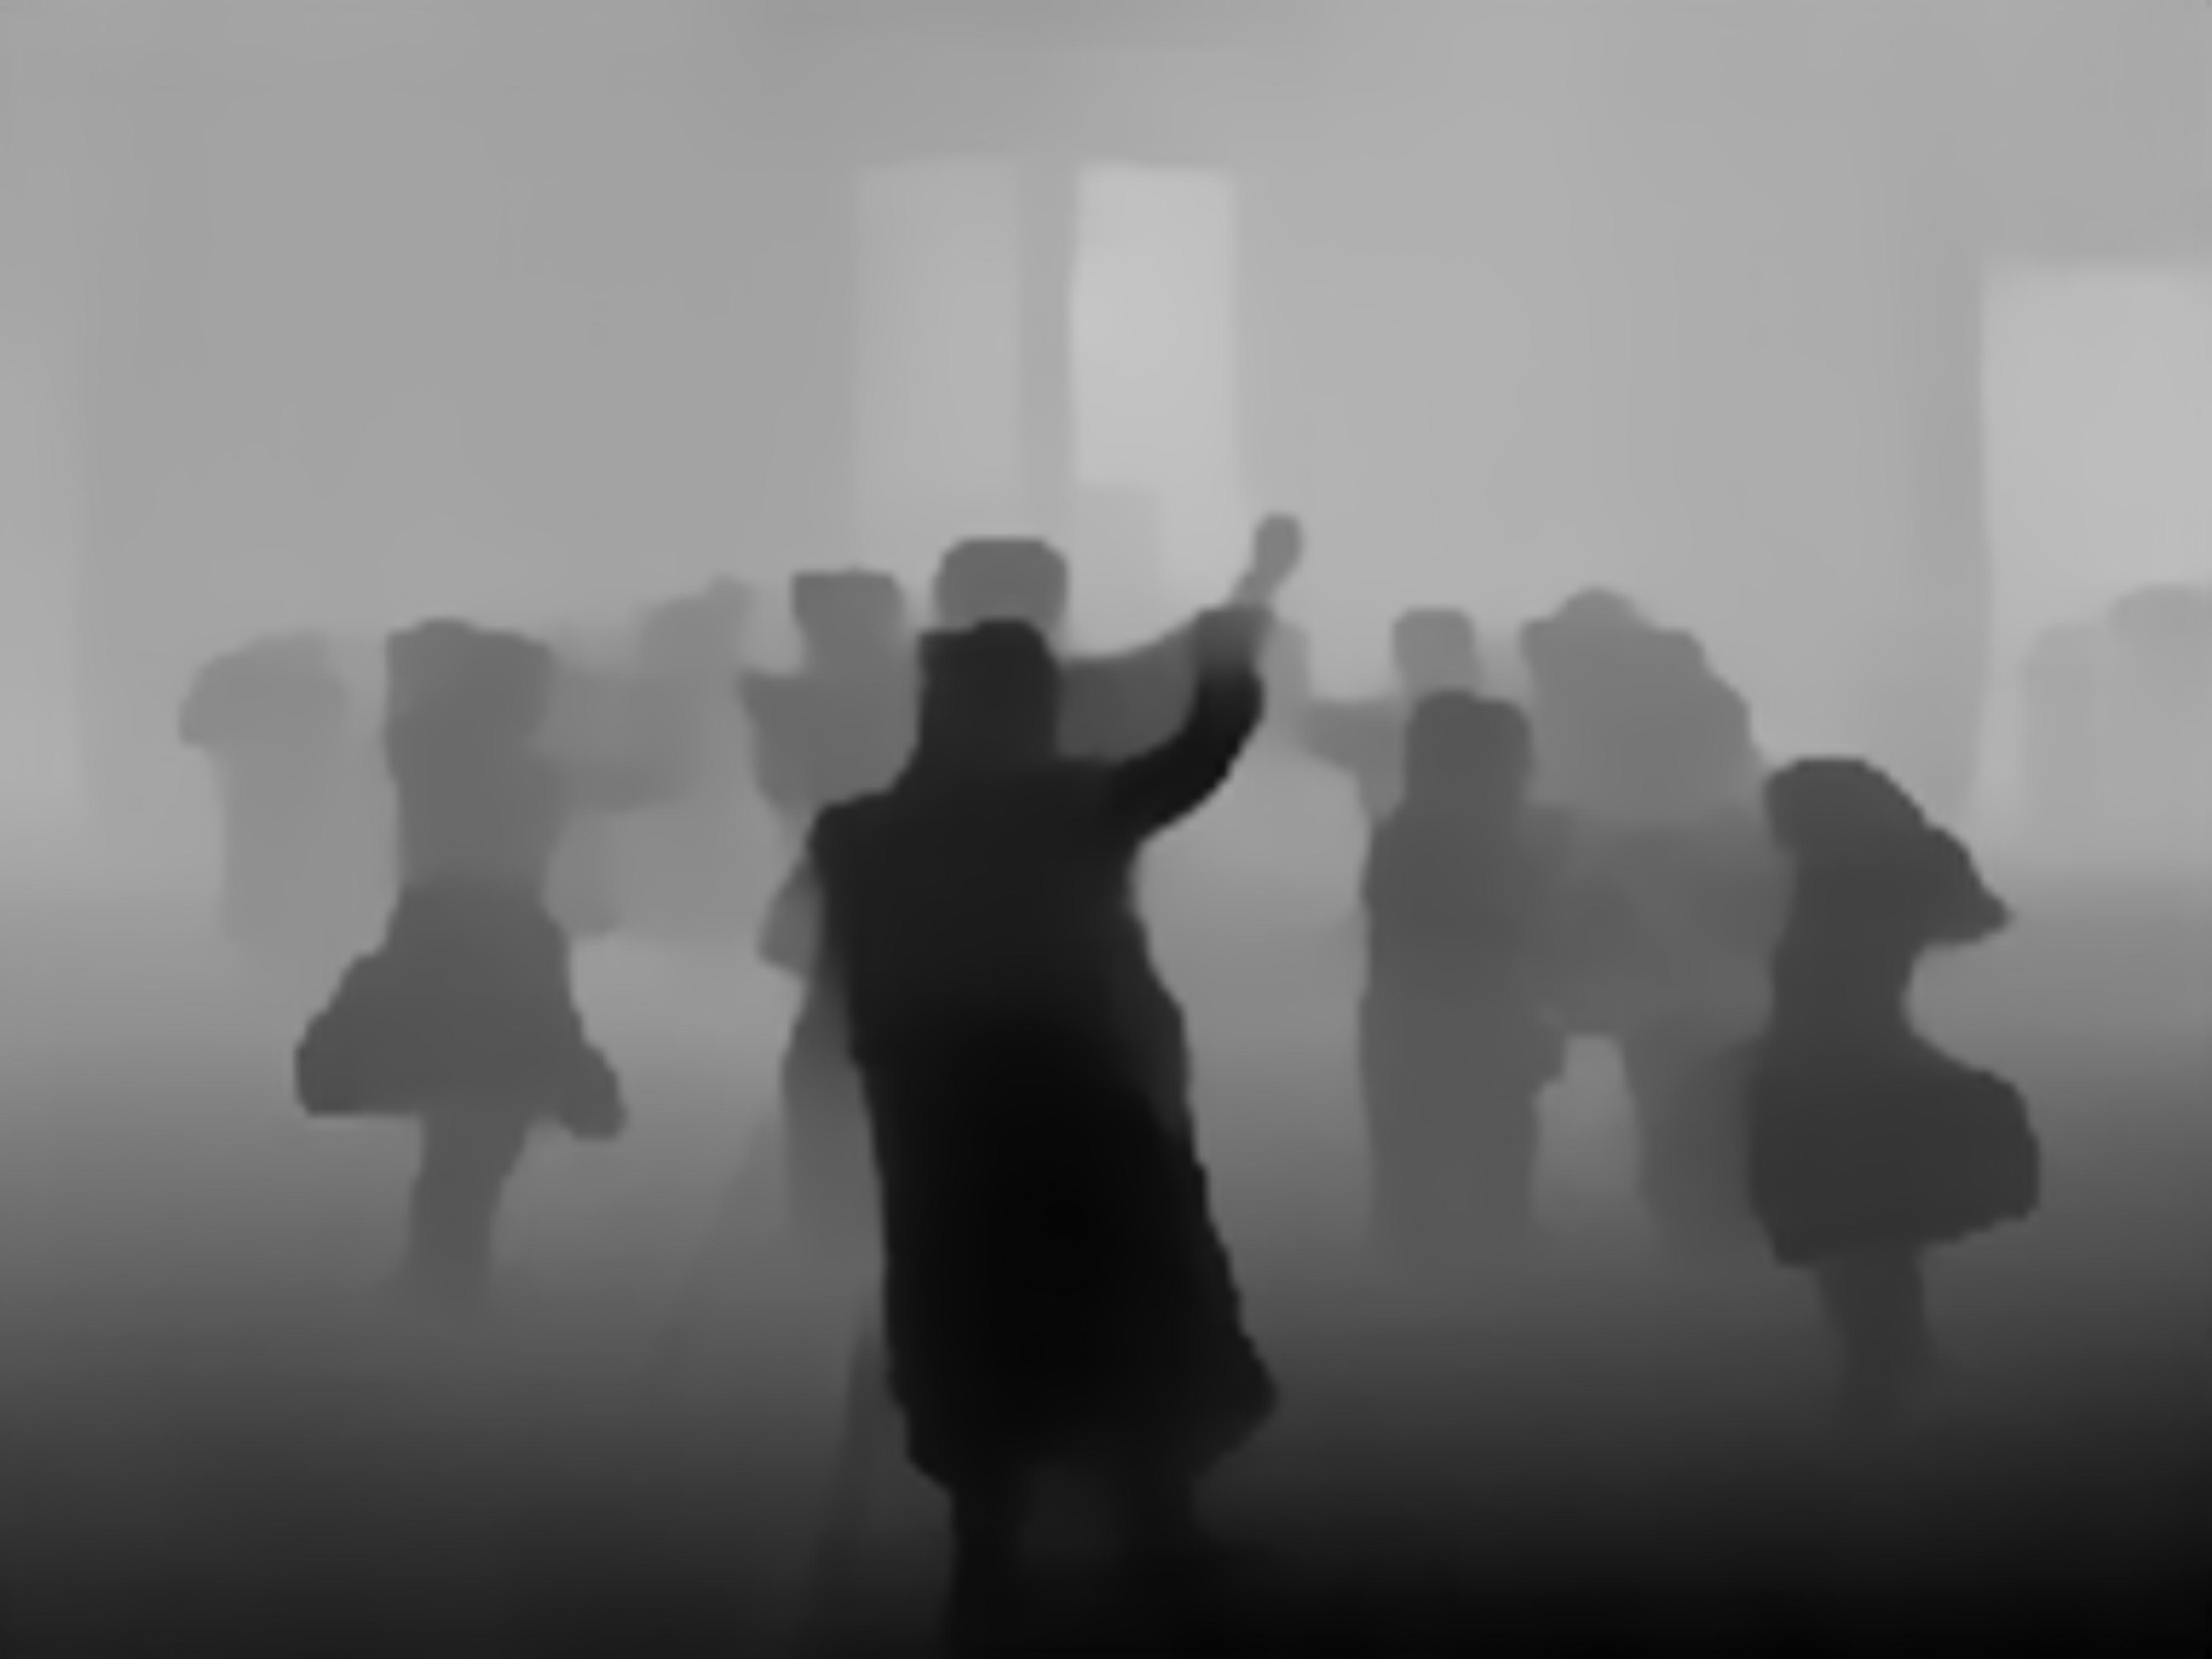

<IPython.core.display.Javascript object>

In [5]:
#@title Show interactive results
import os
from IPython.display import Image, HTML, Javascript
def load_pixijs_in_cell_output():
  display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/pixi.js/4.7.0/pixi.min.js'></script>"))
get_ipython().events.register('pre_run_cell', load_pixijs_in_cell_output)

js_code = '''
var displacementFilter;

function createCanvas() {
	var canvas = document.createElement('canvas');
  canvas.style.width = '80%';
	canvas.id = "ID"+(Date.now().toString(36) + Math.random().toString(36).substr(2, 5)).toUpperCase();
	document.querySelector("#output-area").appendChild(canvas);
	return "#"+canvas.id;
}
function loadImage(src, depth) {
var canvas_id = createCanvas();
var img = new Image();
img.src = src;
img.onload = (e) => {
	showImage(e.target, depth, canvas_id, e.target.naturalWidth, e.target.naturalHeight);	
}
}
function showImage(src1, src2, canvas_id, w, h) {
 var canvasWidth = w; 
 var canvasHeight = h; 
 var app = new PIXI.Application(canvasWidth,  canvasHeight, { 
   antialias: true, 
   transparent: true, 
   view: document.querySelector(canvas_id) 
 });

 app.stage.alpha = 1;
 app.stage.interactive = true;

 var layer1 = new PIXI.Sprite.from(src1);
 var dmap = new PIXI.Sprite.from(src2);

 var mainContainer = new PIXI.Container();


  mainContainer.addChild(layer1);
  mainContainer.addChild(dmap);

  displacementFilter = new    PIXI.filters.DisplacementFilter(dmap, 0);
  layer1.filters = [displacementFilter]; 
  app.stage.addChild(mainContainer);
  setMoveHandlers(app, displacementFilter);
}

function setMoveHandlers(app, displacementFilter) {
app.stage
    .on("mousemove", onPointerMove.bind(null, displacementFilter))
    .on("touchmove", onPointerMove.bind(null, displacementFilter));
}

function onPointerMove(displacementFilter, eventData)

{
  setTilt(25, eventData.data.global.x, eventData.data.global.y, displacementFilter);
    
}

function setTilt(maxTilt, mouseX, mouseY, displacementFilter) {
  
  var midpointX = displacementFilter.uniforms.mapSampler.orig.width / 2,
  midpointY = displacementFilter.uniforms.mapSampler.orig.height / 2,
  posX = midpointX-mouseX,
  posY = midpointY-mouseY,
  valX = (posX / midpointX) * maxTilt,
  valY = (posY / midpointY) * maxTilt;
  displacementFilter.scale.x = valX;
  displacementFilter.scale.y = valY;
   
}
'''
display_img_js = '''
var allImages = document.querySelectorAll(".output_image img");
loadImage(allImages[allImages.length-2].src, allImages[allImages.length-1].src);

for (im of allImages) {
  im.style.display = 'none';
}
'''
display(Javascript(js_code))
for file in os.listdir("outfile/"):
    if file.lower().endswith(".jpg"):
        display(Image(os.path.join("infile/", file)))
        display(Image(os.path.join("outfile/", file)))
        display(Javascript(display_img_js))